In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [62]:
rep_df = pd.read_csv('/home/skorsak/Data/Replication/timing/humans/A2780_hg38_smoothed.txt',sep='\t')
rep_df = rep_df.fillna(0)

In [63]:
def sanitize_chr_dataframe(df):
    """
    Takes a pandas DataFrame and checks whether the first column header looks like 'Chr', 'chrom', etc.
    If so, the header row is discarded and column names are reset to integers: 0, 1, 2, ...
    """
    chr_like = ['chr', 'chrom', 'chromosome']
    
    # Get the first column header, normalized
    first_col = str(df.columns[0]).strip().lower()
    
    if any(first_col.startswith(prefix) for prefix in chr_like):
        # Header is present, so remove the first row and reset index
        df = df.drop(index=0).reset_index(drop=True)

    # Rename all columns to integers
    df.columns = range(df.shape[1])
    
    return df

rep_df = sanitize_chr_dataframe(rep_df)
rep_df[0] = 'chr'+rep_df[0].astype(str)
rep_df

,0,1,2
0,chr1,49104.0,1.3832
1,chr1,53194.0,1.3833
2,chr1,55676.0,1.3834
3,chr1,57462.0,1.3835
4,chr1,60234.0,1.3836
...,...,...,...
703462,chr23,155679001.0,-0.8127
703463,chr23,155683289.0,-0.8216
703464,chr23,155688144.0,-0.8317
703465,chr23,155693698.0,-0.8433


In [64]:
rep_df[rep_df[0]==chrom]

,0,1,2


In [51]:
chrom = 1

In [52]:
rep_df = rep_df[rep_df[0]==chrom].reset_index(drop=True)

In [53]:
rep_time = rep_df[2].values

In [54]:
rep_time = (rep_time-np.min(rep_time))/(np.max(rep_time)-np.min(rep_time))

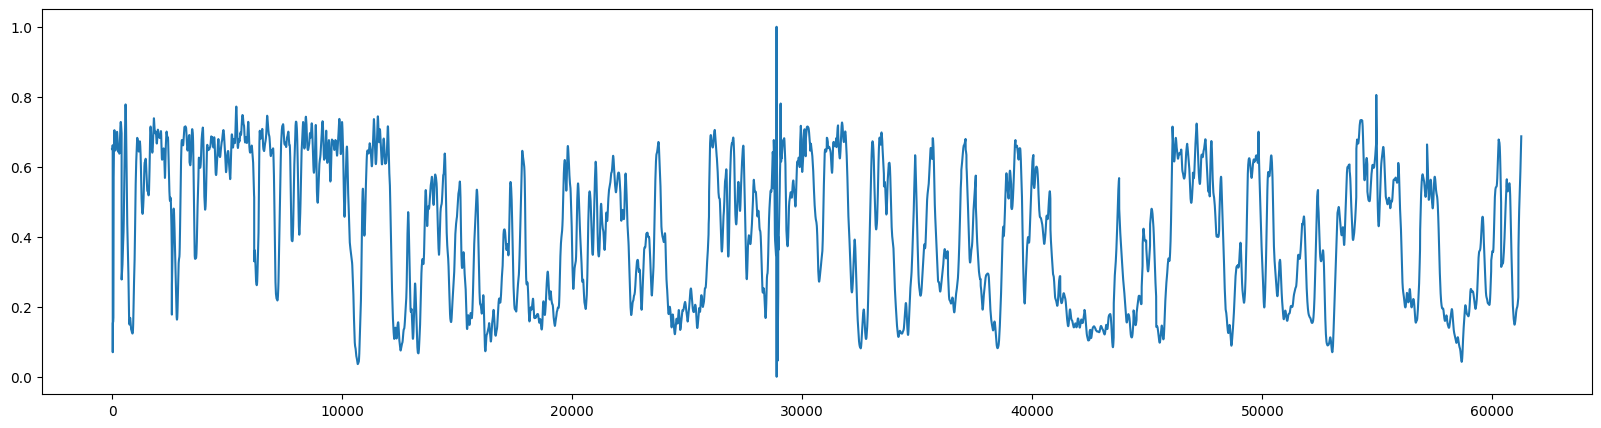

In [55]:
figure(figsize=(20,5))
plt.plot(rep_time)

In [39]:
0.1*np.std(rep_time)

0.01799143780512334